<a href="https://colab.research.google.com/github/salimunlu47/python-scikit-learn/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/salimunlu47/python-scikit-learn/main/datasets/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop("sales",axis=1)

In [4]:
y = df["sales"]

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=True)

In [7]:
polynomial_converter.fit(X, y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [8]:
polynomial_converter.transform(X)

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [9]:
X.shape

(200, 3)

In [10]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [11]:
poly_features = polynomial_converter.transform(X)

In [12]:
poly_features[0] #3 originla, 3 interaction, 3 squared

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [13]:
polynomial_converter.fit_transform(X)

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

## Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation on the Test Set

In [19]:
test_predictions = model.predict(X_test)

In [20]:
model.coef_

array([ 0.00000000e+00,  5.17095811e-02,  1.30848864e-02,  1.20000085e-02,
       -1.10892474e-04,  1.14212673e-03, -5.24100082e-05,  3.34919737e-05,
        1.46380310e-04, -3.04715806e-05])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4896798044802885

In [23]:
MSE = mean_squared_error(y_test, test_predictions)
MSE

0.441750551040247

In [24]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757268308

In [25]:
model.coef_

array([ 0.00000000e+00,  5.17095811e-02,  1.30848864e-02,  1.20000085e-02,
       -1.10892474e-04,  1.14212673e-03, -5.24100082e-05,  3.34919737e-05,
        1.46380310e-04, -3.04715806e-05])

In [26]:
poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [27]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [28]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399345,
 0.2509342962601729,
 0.20872723323990613,
 5.42157751435276,
 0.140867515824127,
 0.17118580360234556]

In [29]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269274,
 0.5803286825215619,
 0.5077742637898888,
 2.5758141220971607,
 4.335318691649054,
 1379.1716104914929,
 4129.0608136161545,
 96107.72947631204]

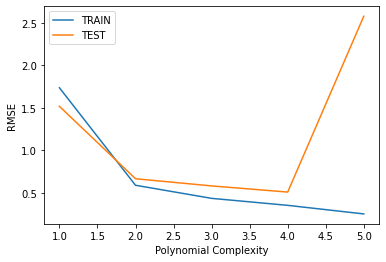

In [30]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [31]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [32]:
final_model = LinearRegression()

In [33]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Saving Model and Converter

In [34]:
from joblib import dump, load

In [35]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [36]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [37]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [38]:
campaign = [[149,22,12]]

In [39]:
campaign_poly = loaded_poly.transform(campaign)

In [40]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [41]:
final_model.predict(campaign_poly)

array([14.64501014])